In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm

In [2]:
%%time
df_br = pd.read_csv('../data/df_business_reviews.csv')
df_br.head()

CPU times: total: 5.05 s
Wall time: 5.06 s


,business_id,name,address,city,state,postal_code,latitude,longitude,overall_stars,review_count,...,hours,clean_cat,review_id,user_id,review_stars,useful,funny,cool,text,date
0,ltBBYdNzkeKdCNPDAsxwAA,Tavern,1904 Broadway,Nashville,TN,37203.0,36.150900,-86.797012,4.0,1222,...,"{'Monday': '0:0-0:0', 'Wednesday': '10:0-22:0'...","American (New), Bars, Cocktail Bars, Gastropub...",elqRpX9T3YwL07uLNtN3Bg,-sryo4gDYxbZ1T5Bz4l5Bw,2,0,0,0,I at least have to give this restaurant two st...,2015-02-02 04:29:13
1,Zx7n8mdt8OzLRXVzolXNhQ,Milk and Honey Nashville,214 11th Ave S,Nashville,TN,37203.0,36.154702,-86.784541,4.0,1725,...,"{'Monday': '0:0-0:0', 'Thursday': '6:30-15:0',...","American (New), American (Traditional), Breakf...",E9AB7V4z8xrt2uPF7T55FQ,iYY5Ii1LGpZCpXFkHlMefw,5,0,0,0,Amazing biscuits and (fill in the blank). Grea...,2018-04-27 23:03:21
2,eaJCpC6IhYphj7bwCDHTwQ,Three Brothers Coffee,2813 W End Ave,Nashville,TN,37203.0,36.144808,-86.812266,4.5,249,...,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-19:0', '...","Bagels, Cafes, Coffee & Tea, Food, Internet Ca...",qGQvUHmC02PAZW3H1WTIfw,RRTQpg8hutdimzAYuP_Hbw,5,0,0,0,Stopped by after a Sunday morning walk in the ...,2015-08-30 13:41:47
3,oQ5CPRt0R3AzFvcjNOqB1w,Edley's Bar-B-Que - 12 South,2706 12th Ave S,Nashville,TN,37204.0,36.122973,-86.789782,4.0,1114,...,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...","Barbeque, Bars, Cocktail Bars, Dive Bars, Nigh...",67cGcRrS0jTvB8p7rpaPew,8YSxVaD203mE_9FR4nCEVA,3,1,0,0,Honestly the food doesn't knock my socks off b...,2016-01-17 13:26:19
4,9OtFX3YzG5keaUMOWU1imA,Champions,600 Marriott Drive,Nashville,TN,37214.0,36.146207,-86.693053,4.0,73,...,"{'Monday': '6:0-1:0', 'Tuesday': '6:0-1:0', 'W...","American (New), American (Traditional), Bars, ...",DOeEDBfsrNph0ktNkYYFnQ,qVYilGRmY6uemAy_tDpfuA,5,4,0,0,Man. This place is nice. The bartender was awe...,2014-05-26 01:56:19


In [3]:
df_br.shape

(326356, 23)

In [4]:
df_rev = df_br[['review_stars', 'text']]
df_rev

,review_stars,text
0,2,I at least have to give this restaurant two st...
1,5,Amazing biscuits and (fill in the blank). Grea...
2,5,Stopped by after a Sunday morning walk in the ...
3,3,Honestly the food doesn't knock my socks off b...
4,5,Man. This place is nice. The bartender was awe...
...,...,...
326351,2,Slow slowwwww sllllooooowwwww service. And the...
326352,4,Nice place to eat. It was packed. You may wa...
326353,1,We were stranded in Nashville for an extra day...
326354,1,"The supper club is ridiculously expensive. So,..."


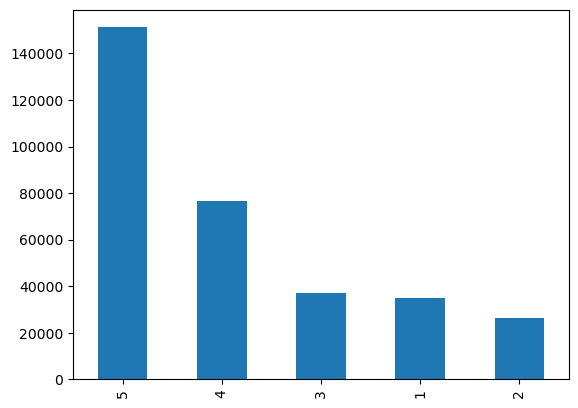

In [5]:
df_rev['review_stars'].value_counts().plot(kind = 'bar')
plt.show()

In [9]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [16]:
sample = df_rev[:20]

In [27]:
sample.loc[6, 'text']

"Been to this location twice and will never go back again!!!!\n\nFirst time was mediocre, the second time was so very disappointing it beggars belief. I ordered some ribs and had to send them back because one half was warm and the other half was refrigerator cold. They came back and one side was really hot and the other side was still cold, third time it was edible. The manager came over the third time to apologize, never once offered to comp anything. I'm not the kind of guy to cause a fuss to get something comped, but to send something back three times to get it cooked properly and only get an insincere apology really pisses me off, enough for me to write this review."

In [29]:
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower().strip() for token in doc if not token.is_stop
             and not token.is_digit
             and not token.is_punct
             and not token.is_space]
    return tokens

In [30]:
%%time
sample['clean'] = sample['text'].apply(preprocess_text)

CPU times: total: 250 ms
Wall time: 244 ms


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [32]:
sample

,review_stars,text,clean
0,2,I at least have to give this restaurant two st...,"[restaurant, star, decent, food, dinner, meeti..."
1,5,Amazing biscuits and (fill in the blank). Grea...,"[amazing, biscuit, fill, blank, great, cocktai..."
2,5,Stopped by after a Sunday morning walk in the ...,"[stop, sunday, morning, walk, park, great, foo..."
3,3,Honestly the food doesn't knock my socks off b...,"[honestly, food, knock, sock, people, love, pl..."
4,5,Man. This place is nice. The bartender was awe...,"[man, place, nice, bartender, awesome, try, bu..."
5,5,This place was so chill and relaxing. When I c...,"[place, chill, relaxing, come, definitely, lis..."
6,1,Been to this location twice and will never go ...,"[location, twice, time, mediocre, second, time..."
7,5,This is one of the busiest Chick fil A's I've ...,"[busy, chick, fil, see, manage, quick, excepti..."
8,5,A menu that satisfies everyone's cravings! Cle...,"[menu, satisfy, craving, clean, trendy, delici..."
9,5,I first heard about this place on the plane ri...,"[hear, place, plane, ride, franklin, local, re..."


In [35]:
from tqdm import tqdm
tqdm.pandas()

df_rev['clean'] = df_rev['text'].progress_apply(preprocess_text)

100%|██████████| 326356/326356 [1:20:07<00:00, 67.89it/s]
C:\Users\16156\AppData\Local\Temp\ipykernel_25412\3937708444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rev['clean'] = df_rev['text'].progress_apply(preprocess_text)


In [36]:
df_rev

,review_stars,text,clean
0,2,I at least have to give this restaurant two st...,"[restaurant, star, decent, food, dinner, meeti..."
1,5,Amazing biscuits and (fill in the blank). Grea...,"[amazing, biscuit, fill, blank, great, cocktai..."
2,5,Stopped by after a Sunday morning walk in the ...,"[stop, sunday, morning, walk, park, great, foo..."
3,3,Honestly the food doesn't knock my socks off b...,"[honestly, food, knock, sock, people, love, pl..."
4,5,Man. This place is nice. The bartender was awe...,"[man, place, nice, bartender, awesome, try, bu..."
...,...,...,...
326351,2,Slow slowwwww sllllooooowwwww service. And the...,"[slow, slowwwww, sllllooooowwwww, service, ord..."
326352,4,Nice place to eat. It was packed. You may wa...,"[nice, place, eat, pack, want, early, go, sunday]"
326353,1,We were stranded in Nashville for an extra day...,"[strand, nashville, extra, day, cancel, flight..."
326354,1,"The supper club is ridiculously expensive. So,...","[supper, club, ridiculously, expensive, go, do..."


In [37]:
df_rev.to_csv('../data/review_tokens.csv')

In [6]:
df_rev = pd.read_csv('../data/review_tokens.csv')

In [11]:
df_rev

,review_stars,text,clean
0,2,I at least have to give this restaurant two st...,"['restaurant', 'star', 'decent', 'food', 'dinn..."
1,5,Amazing biscuits and (fill in the blank). Grea...,"['amazing', 'biscuit', 'fill', 'blank', 'great..."
2,5,Stopped by after a Sunday morning walk in the ...,"['stop', 'sunday', 'morning', 'walk', 'park', ..."
3,3,Honestly the food doesn't knock my socks off b...,"['honestly', 'food', 'knock', 'sock', 'people'..."
4,5,Man. This place is nice. The bartender was awe...,"['man', 'place', 'nice', 'bartender', 'awesome..."
...,...,...,...
326351,2,Slow slowwwww sllllooooowwwww service. And the...,"['slow', 'slowwwww', 'sllllooooowwwww', 'servi..."
326352,4,Nice place to eat. It was packed. You may wa...,"['nice', 'place', 'eat', 'pack', 'want', 'earl..."
326353,1,We were stranded in Nashville for an extra day...,"['strand', 'nashville', 'extra', 'day', 'cance..."
326354,1,"The supper club is ridiculously expensive. So,...","['supper', 'club', 'ridiculously', 'expensive'..."


In [10]:
df_rev = df_rev.drop(columns = 'Unnamed: 0')

In [19]:
%%time
df_br_token = pd.concat([df_br.drop(columns='text'), df_rev], axis = 1 )

CPU times: total: 125 ms
Wall time: 129 ms


In [20]:
df_br_token.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,overall_stars,review_count,...,review_id,user_id,review_stars,useful,funny,cool,date,review_stars,text,clean
0,ltBBYdNzkeKdCNPDAsxwAA,Tavern,1904 Broadway,Nashville,TN,37203.0,36.150900,-86.797012,4.0,1222,...,elqRpX9T3YwL07uLNtN3Bg,-sryo4gDYxbZ1T5Bz4l5Bw,2,0,0,0,2015-02-02 04:29:13,2,I at least have to give this restaurant two st...,"['restaurant', 'star', 'decent', 'food', 'dinn..."
1,Zx7n8mdt8OzLRXVzolXNhQ,Milk and Honey Nashville,214 11th Ave S,Nashville,TN,37203.0,36.154702,-86.784541,4.0,1725,...,E9AB7V4z8xrt2uPF7T55FQ,iYY5Ii1LGpZCpXFkHlMefw,5,0,0,0,2018-04-27 23:03:21,5,Amazing biscuits and (fill in the blank). Grea...,"['amazing', 'biscuit', 'fill', 'blank', 'great..."
2,eaJCpC6IhYphj7bwCDHTwQ,Three Brothers Coffee,2813 W End Ave,Nashville,TN,37203.0,36.144808,-86.812266,4.5,249,...,qGQvUHmC02PAZW3H1WTIfw,RRTQpg8hutdimzAYuP_Hbw,5,0,0,0,2015-08-30 13:41:47,5,Stopped by after a Sunday morning walk in the ...,"['stop', 'sunday', 'morning', 'walk', 'park', ..."
3,oQ5CPRt0R3AzFvcjNOqB1w,Edley's Bar-B-Que - 12 South,2706 12th Ave S,Nashville,TN,37204.0,36.122973,-86.789782,4.0,1114,...,67cGcRrS0jTvB8p7rpaPew,8YSxVaD203mE_9FR4nCEVA,3,1,0,0,2016-01-17 13:26:19,3,Honestly the food doesn't knock my socks off b...,"['honestly', 'food', 'knock', 'sock', 'people'..."
4,9OtFX3YzG5keaUMOWU1imA,Champions,600 Marriott Drive,Nashville,TN,37214.0,36.146207,-86.693053,4.0,73,...,DOeEDBfsrNph0ktNkYYFnQ,qVYilGRmY6uemAy_tDpfuA,5,4,0,0,2014-05-26 01:56:19,5,Man. This place is nice. The bartender was awe...,"['man', 'place', 'nice', 'bartender', 'awesome..."
5,X_E7U2lVNEwbH_gpOBmAHQ,Cerveza Jack's,135 2nd Ave N,Nashville,TN,37201.0,36.162799,-86.776016,4.0,182,...,xumAI7br1X67OY_bU_Yqhg,jEmClJb6wjfDUksVMO_Jjg,5,0,0,0,2017-06-17 17:46:55,5,This place was so chill and relaxing. When I c...,"['place', 'chill', 'relaxing', 'come', 'defini..."
6,EBn3U4mpnIRLIy2lKuilRQ,Logan's Roadhouse,727 Thompson Ln,Nashville,TN,37204.0,36.111914,-86.766502,2.0,120,...,pl5AjpEcFxFTltkBvHjsRA,YjS6MDNwGbueb5WtALIJ2A,1,0,0,0,2012-11-06 18:54:49,1,Been to this location twice and will never go ...,"['location', 'twice', 'time', 'mediocre', 'sec..."
7,jOOOrH5n2ijnsZKxzPSAiw,Chick-fil-A,6500 Charlotte Pike,Nashville,TN,37209.0,36.140237,-86.879696,3.5,112,...,9IG9eB3K-RdIonPBuZ0psw,t2IL-HIXQKd6iZ6cIY8kcg,5,0,0,0,2016-04-23 15:13:10,5,This is one of the busiest Chick fil A's I've ...,"['busy', 'chick', 'fil', 'see', 'manage', 'qui..."
8,Zx7n8mdt8OzLRXVzolXNhQ,Milk and Honey Nashville,214 11th Ave S,Nashville,TN,37203.0,36.154702,-86.784541,4.0,1725,...,zcj7iTXdSz0GCBOReMTeiQ,X8XCFMZN8pFlWEZcKuKzZw,5,0,0,0,2018-01-21 17:12:47,5,A menu that satisfies everyone's cravings! Cle...,"['menu', 'satisfy', 'craving', 'clean', 'trend..."
9,pSmOH4a3HNNpYM82J5ycLA,The Pancake Pantry,1796 21st Ave S,Nashville,TN,37212.0,36.136985,-86.800538,4.0,2063,...,S4nZgOgiv9w8MOiaWTpwBQ,8fPlzYWo0j_nQrJMeyF0Fw,5,0,0,0,2015-06-08 21:11:20,5,I first heard about this place on the plane ri...,"['hear', 'place', 'plane', 'ride', 'franklin',..."


In [ ]:
df_br_token

In [21]:
df_br_token.to_csv('../data/df_br_token.csv', index = False)

- text length
- bins text length and rating
- patterns
- correlations(vs. satisfaction)
- idenfifying more common words/phrases
- word frequencies analysis
- sentiment analysis
- price range
- location
- working hours/open for a longer time
- visualization
- geographical analysis/traffic
- day of time+ 
- food type vs rating
